<a href="https://www.kaggle.com/code/jwblackston/washington-d-c-homeless-facilities-and-support?scriptVersionId=111405705" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Homeless Facilities in the Washington, D.C. Metropolitan Area

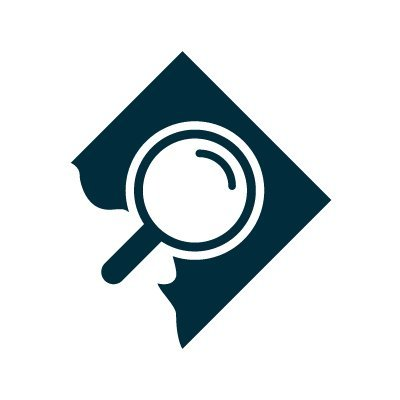

This notebook serves as an example for analyzing data obtained from [DC's Open Data portal](https://opendata.dc.gov) in accordance with creative commons licensing. Descriptions of the dataset and data dictionary can be found in my dataset page on [Kaggle here.](https://www.kaggle.com/datasets/jwblackston/dc-homeless-service-facilities) 

Please feel free to contribute, comment or provide any feedback to make this data better! 

### Objective: to describe the state of homelessness support in the D.C. metro area

Homelessness is a nationwide problem, and it appears to be increasing year over year (link/source). Its root causes are likely multifactorial, so we will not get into the weeds of that discussion just yet. Rather, as a D.C. resident myself, I thought it might be useful to catalog the services available to anyone out there experiencing homelesness. What facilities nearby offer what services? 

Hopefully these data demonstrate areas of higher need and potential gaps to be addressed in our local governance and overall community support. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

start = time.time()
print("Setup Complete")

/kaggle/input/dc-homeless-service-facilities/Homeless_Service_Facilities.csv
Setup Complete


In [2]:
import warnings
warnings.filterwarnings('ignore')

homeless = pd.read_csv('../input/dc-homeless-service-facilities/Homeless_Service_Facilities.csv')

df_1 = homeless
df_1.columns = df_1.columns.str.lower()

df_2 = df_1[['program_name','x', 'y', 'ward', 'zipcode', 
             'mar_id', 'latitude', 'longitude',
             'clients_served_per_day', 'target', 'meals', 'mental_health', 
             'medical_services', 'clothing', 'laundry', 'computers', 'case_management', 'food_groceries', 'open_to_public', 
             'vocational_training', 'tanf_financial_assistance', 'showers', 'snap_food_stamps']]

df_2 = df_2.replace(to_replace = np.nan, value = 0)
df_2 = df_2.replace(['Yes'],1)
df_2['ward_number'] = pd.to_numeric(df_2['ward'].str.replace(r'\D+', ''), errors='coerce')

df_3 = df_2[df_2.clients_served_per_day != 0]

print("Data are cleaned and ready for analysis!")
print("There are " + str(len(df_2)) + " homelessness facilities in the D.C. area as of 2018.")
print("There are only " + str(len(df_3)) + " who report having served an individual experiencing homelessness in these data.")

Data are cleaned and ready for analysis!
There are 115 homelessness facilities in the D.C. area as of 2018.
There are only 26 who report having served an individual experiencing homelessness in these data.


In [3]:
df_2.describe()

,x,y,zipcode,mar_id,latitude,longitude,clients_served_per_day,meals,mental_health,medical_services,clothing,laundry,computers,case_management,food_groceries,vocational_training,tanf_financial_assistance,showers,snap_food_stamps,ward_number
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,113.000000
mean,-77.008201,38.902409,19663.052174,258687.452174,38.902402,-77.008199,17.593169,0.182609,0.130435,0.113043,0.173913,0.121739,0.400000,0.278261,0.113043,0.347826,0.095652,0.130435,0.095652,4.725664
std,0.033051,0.028426,2627.398055,115948.376210,0.028426,0.033051,50.197365,0.388036,0.338255,0.318032,0.380693,0.328415,0.492042,0.450104,0.318032,0.478365,0.295401,0.338255,0.295401,2.338527
min,-77.097177,38.829994,0.000000,15509.000000,38.829987,-77.097175,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-77.031174,38.884844,20002.000000,237046.500000,38.884837,-77.031171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,-77.011432,38.900421,20009.000000,280033.000000,38.900413,-77.011430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,-76.989297,38.919010,20019.000000,295140.000000,38.919002,-76.989295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.000000
max,-76.929015,38.980288,20037.000000,901542.000000,38.980281,-76.929012,400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


### Data Visualization:

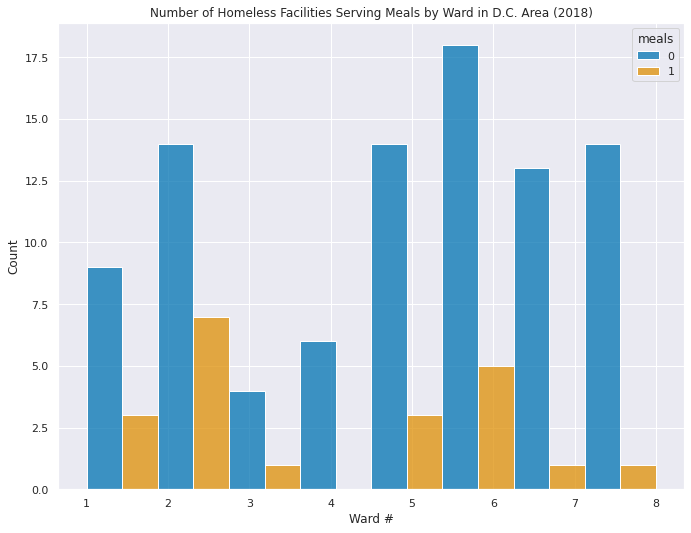

In [4]:
plt.style.use('fivethirtyeight')

sns.set(rc={"figure.figsize": (10, 8)})
sns.histplot(data = df_2,
            x = 'ward_number', hue = 'meals', multiple = 'dodge', palette = 'colorblind')

plt.xlabel("Ward #")
plt.title("Number of Homeless Facilities Serving Meals by Ward in D.C. Area (2018)")
plt.show()

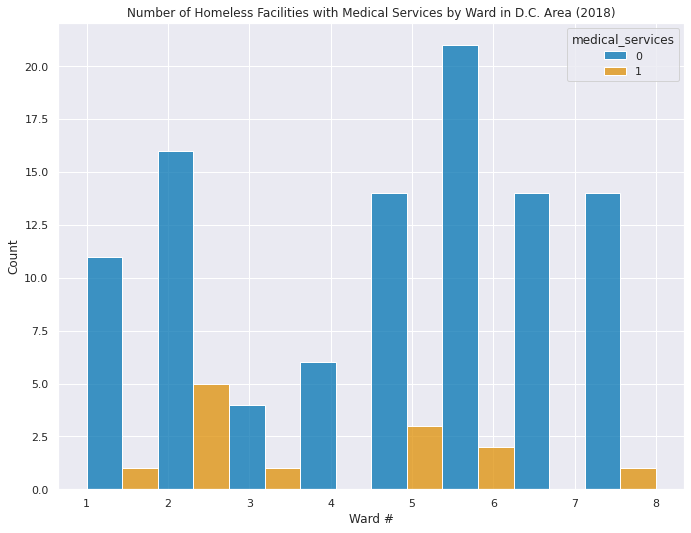

In [5]:
plt.style.use('fivethirtyeight')

sns.set(rc={"figure.figsize": (10, 8)})
sns.histplot(data = df_2,
            x = 'ward_number', hue = 'medical_services', multiple = 'dodge', palette = 'colorblind')

plt.xlabel("Ward #")
plt.title("Number of Homeless Facilities with Medical Services by Ward in D.C. Area (2018)")
plt.show()

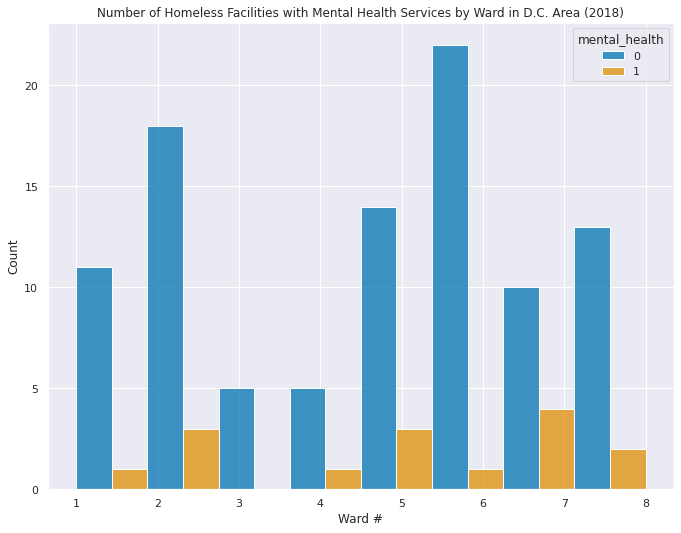

In [6]:
plt.style.use('fivethirtyeight')

sns.set(rc={"figure.figsize": (10, 8)})
sns.histplot(data = df_2,
            x = 'ward_number', hue = 'mental_health', multiple = 'dodge', palette = 'colorblind')

plt.xlabel("Ward #")
plt.title("Number of Homeless Facilities with Mental Health Services by Ward in D.C. Area (2018)")
plt.show()

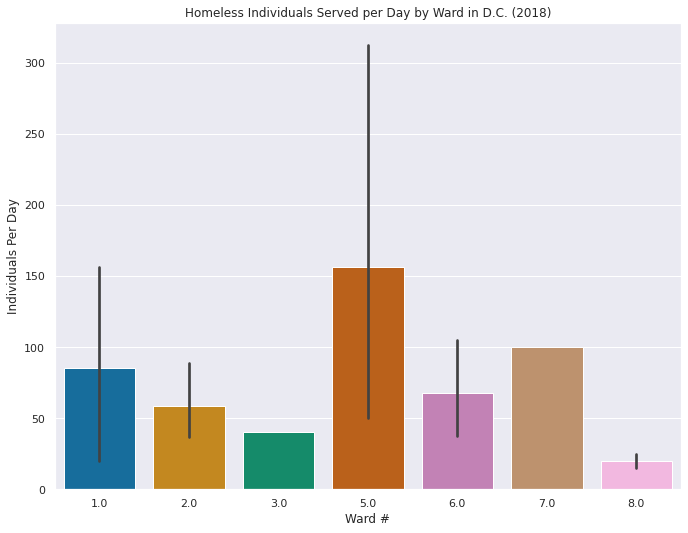

In [7]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize": (10, 8)})

fig, ax = plt.subplots()
sns.barplot(data = df_3,
            x = 'ward_number', y = 'clients_served_per_day', palette = 'colorblind')

ax.set_title("Homeless Individuals Served per Day by Ward in D.C. (2018)")
ax.set_xlabel("Ward #")
ax.set_ylabel("Individuals Per Day")
plt.show()

In [8]:
end = time.time()
print('Time elapsed (s): ', round(end - start, 1))

Time elapsed (s):  1.7


Thanks for taking a gander at my notebook! Hopefully this serves as a good starting point for discussion and further investigation. 

If you'd like to offer any suggestions, comments, or would like to collaborate on a project, please feel free to email me at blackstonjw@icloud.com.